<div style="
    background-color: #0b2343; 
    color: white; 
    padding: 25px; 
    font-family: Arial, sans-serif;
">
    <h2 style="margin: 0; font-size: 24px; font-weight: normal;">
        Data Analytics & Machine Learning in Finance
    </h2>
    <h1 style="margin: 5px 0 0 0; font-size: 48px; font-weight: bold;">
        Decission Trees (DT)
    </h1>
    <p style="margin: 8px 0 0 0; font-size: 18px;">
        Pedro Ramón Ventura Gómez
    </p>
    <p style="margin: 2px 0 0 0; font-size: 16px;">
        pventura@march-am.com
    </p>
</div>


# Decission Trees (DT)

**Decision Trees** are a **supervised machine learning algorithm** used for classification or regression tasks.

## Classification Trees

* **Supervised:** Requires a labeled training dataset (features and target variable) to make predictions.
* **Classification:** Recursively splits the feature space into regions using decision rules based on feature values, forming a tree-like structure where each internal node represents a condition, each branch a decision outcome, and each leaf a predicted class.
* **Non-parametric:** Makes no assumptions about the underlying data distribution or a fixed number of parameters.
* **Main hyperparameters:** Maximum tree depth, minimum samples per split/leaf, and the criterion used to measure split quality (e.g., Gini impurity, entropy).

## Regression Trees

* **Supervised:** Requires a labeled training dataset (features and continuous target variable) to make predictions.
* **Regression:** Recursively splits the feature space into regions to minimize prediction error within each region (typically using metrics such as Mean Squared Error or Mean Absolute Error).
* **Non-parametric:** Makes no assumptions about the underlying data distribution or a fixed number of parameters.
* **Main hyperparameters:** Maximum tree depth, minimum samples per split/leaf, and the criterion used to measure split quality (e.g., MSE, MAE).


## How it works?

<img src="images/algorithms/dt-intro_0.png" style="display:block; margin:auto; width:50%">

- Iteration 1

<img src="images/algorithms/dt-intro_1.png" style="display:block; margin:auto; width:75%">

- Iteration 2

<img src="images/algorithms/dt-intro_2.png" style="display:block; margin:auto; width:75%">

- Iteration 3

<img src="images/algorithms/dt-intro_3.png" style="display:block; margin:auto; width:75%">

## How to know **which is the best split**?

When building a decision tree, we choose the split that produces the **purest** child nodes — i.e., nodes where most samples belong to a single class.
Two common measures of impurity are **Entropy** and **Gini impurity**.


### Entropy

Measures the **degree of disorder** (uncertainty) in a node.
A node with samples from only one class has entropy = 0 (perfectly pure).

$$
\text{Entropy}(t) = - \sum_{j=1}^C p_j \log_2(p_j)
$$

Where:

* $C$ = number of classes
* $p_j$ = proportion of samples in class $j$ at node $t$

**Remarks:**

* Perfectly pure node (100% Class A): Entropy = 0
* Completely mixed node (50% Class A, 50% Class B): Entropy = 1 (maximum disorder)

### Gini Impurity

Measures the probability that a randomly chosen sample in the node would be misclassified if it were labeled according to the class distribution in that node.

$$
\text{Gini}(t) = 1 - \sum_{j=1}^C p_j^2
$$

Where:

- $C$ = number of classes
- $p_j$ = proportion of samples in class $j$ at node $t$

**Remarks:**

- Perfectly pure node (100% Class A): Gini = 0
- Completely mixed node (50% Class A, 50% Class B): Gini = 0.5 (maximum impurity for 2 classes)
Lets see an **example with two classes**. If classes are **0** and **1**, with proportion $p$ for class 1 and $(1-p)$ for class 0:

$$
G = 1 - \left[p^2 + (1-p)^2\right]
$$

Expanding:

$$
G = 1 - \left[p^2 + 1 - 2p + p^2\right]
$$

$$
G = 1 - \left[1 - 2p + 2p^2\right]
$$

$$
G = 2p - 2p^2
$$

$$
G = 2p(1-p)
$$

<img src="images/algorithms/gini_impurity_computation.png" style="width:25%">

- Decission rule: "attribute 0 < 2.5"
- Class 0: blue
- Class 1: red

Gini impurity for *Yes* Node (left) is $G_{Yes}=2 \times \frac{2}{4} \times \frac{2}{4}=\frac{8}{16}=\frac{1}{2}=0.5$

Gini impurity for *No* Node (right) is $G_{No}=2 \times \frac{1}{5} \times \frac{4}{5}=\frac{8}{25}=0.32$

$\text{Total Impurity}=P(Yes) \times G_{Yes} + P(No) \times G_{No}$

Where
- $P(Yes)$ is the probability of belonging to node *Yes*.
- $P(No)$ is the probability of belonging to node *No*.

So

$\text{Total Impurity}=\frac{4}{9} \times 0.5 + \frac{5}{9} \times 0.32 = 0.4$

**Key notes:**

* Both measures are **0 for pure nodes**.
* In practice, **Gini** is slightly faster to compute.
* The “best” split is the one that **maximizes the decrease in impurity** from parent to child nodes (information gain for entropy, Gini gain for Gini impurity).

## Stop Criteria

When growing a decision tree, splitting continues until all leaves are pure or until no further splits are possible.
However, letting the tree grow without limits usually leads to **overfitting** — the tree learns noise and specific patterns from the training data that do not generalize well.

To prevent this, we define **stop criteria**: rules that tell the algorithm when to stop splitting the feature space.

Common Stop Criteria
- **Maximum tree depth:** Limits how many levels the tree can grow. A shallow tree may underfit, while an overly deep tree can overfit.
- **Impurity threshold:** Stop splitting if the impurity of a node is already below a predefined value, meaning the node is *pure* enough.
- **Minimum samples in a leaf node:** A split must leave each child node with at least this number of samples. Prevents creating leaves with very few samples that do not provide robust predictions.

## Advantages and Disadvantages

### Advantages

- **Easy to visualize and interpret:** Decision trees represent decision rules in a simple, hierarchical structure, making them intuitive to understand even for non-technical users.
- **Implicit feature selection:** The splitting process naturally ranks features by importance, with the most discriminative features used closer to the root (the first node).
- **Handles both categorical and numerical data:** Can work directly with mixed data types without the need for one-hot encoding.
- **Fast training and prediction:** Building and traversing a tree is computationally efficient.

### Disadvantages

* **Prone to overfitting:** Without proper stop criteria, trees can become overly complex, memorizing noise in the training data.
* **Sensitive to class imbalance:** If one class dominates (unbalanced classes), the splits may favor the majority class.
* **Greedy algorithm:** At each step, the best split is chosen locally without considering global optimality, which can lead to suboptimal trees. Once the algorithm makes an split it won't be modified in any case.
* **High variance:** Small changes in the training data can produce very different trees.

# Playing with financial assets

Suppose we want to develop an algorithm that tells us whether to invest in a certain asset with an investment horizon of a month (buy and hold strategy).

Our investment thesis is as follows: We assume that past behavior can predict future behavior, meaning that the closest past vectors to the present will indicate what to expect next month.

We will do the following:
1. Download the asset data (adjusted close px).
2. Transform px to monthly log returns.
3. Create features (X) and target (y):
    - X: 6 months returns vector.
    - y: next month return.
4. Split into train and test datasets.
5. Train a K-NN model.
6. Evaluate trained model.

In [69]:
import pprint
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


Download data

In [70]:
# Asset ticker.
asset = "TSLA"
# Pay attention to "auto_adjust=True".
px = yf.download(asset, start="2005-12-31", end="2024-12-31", auto_adjust=True)["Close"]

[*********************100%***********************]  1 of 1 completed


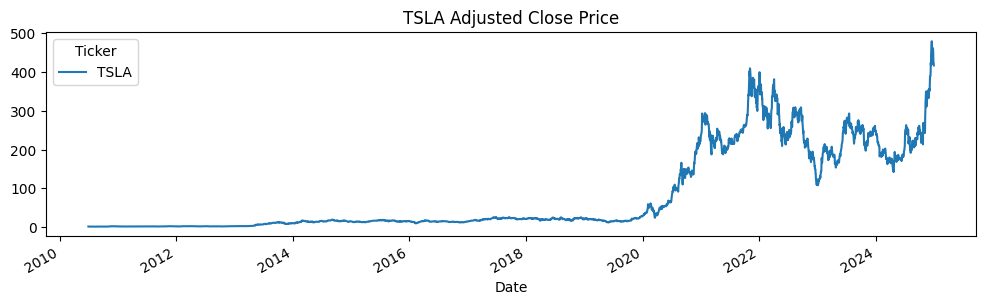

In [71]:
px.plot(figsize=(12, 3), title=f"{asset} Adjusted Close Price")
plt.show()

Compute monthly log returns

In [72]:
# Monthly resample of px (index to Business Month End), take last value.
px_monthly = px.resample("BME").last()
# Compute log returns.
ret = np.log(px_monthly).diff().dropna()

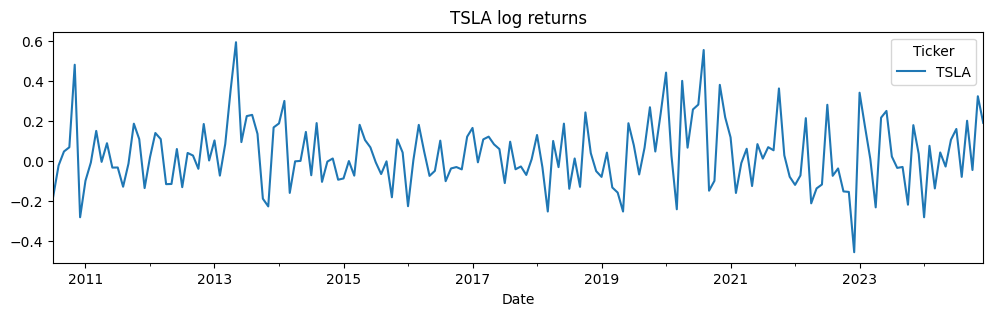

In [73]:
ret.plot(figsize=(12, 3), title=f"{asset} log returns")
plt.show()

Create features (X) and target (y) using a rolling window:
- X: 3 months returns vector.
- y: next month return.

In [74]:
window_size = 6
target_size = 1
X = []  # Features.
y = []  # Target.
for i in range(ret.shape[0] - window_size - target_size):
    X.append(ret.iloc[i : i + window_size].values)
    y.append(ret.iloc[i : i + window_size + target_size].sum().values)

In [75]:
pprint.pprint((len(X), len(y)))  # Dataset length.
pprint.pprint((len(X[0]), len(y[0])))  # Features and target length.

(167, 167)
(6, 1)


[[-0.17821805]
 [-0.02333895]
 [ 0.0466367 ]
 [ 0.06771792]
 [ 0.48098923]
 [-0.28269412]]
[0.01126655]


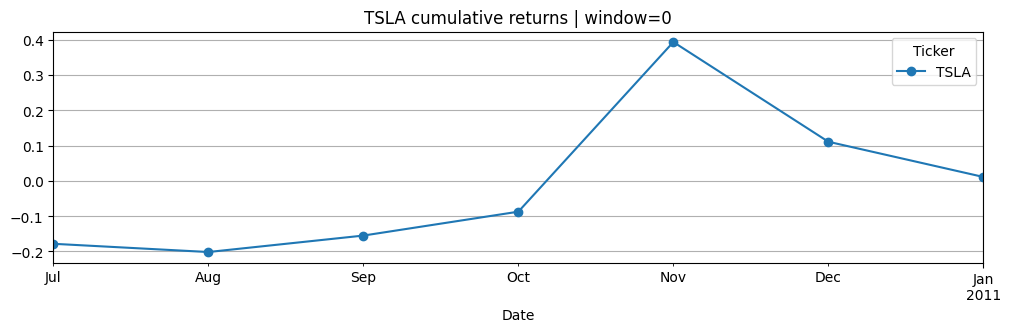

In [76]:
i = 0
print(ret.iloc[i : i + window_size].values)
print(ret.iloc[i : i + window_size + target_size].sum().values)
ret.iloc[i : i + window_size + target_size].cumsum().plot(
    grid=True, figsize=(12, 3), title=f"{asset} cumulative returns | window={i}", marker="o"
)
plt.show()


Split into train and test datasets.

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

X_train = np.array(X_train).reshape(-1, window_size)
X_test = np.array(X_test).reshape(-1, window_size)
y_train = np.array(y_train).reshape(-1) > 0
y_test = np.array(y_test).reshape(-1) > 0

In [78]:
pprint.pprint((len(X_train), len(y_train)))
pprint.pprint((len(X_test), len(y_test)))

(133, 133)
(34, 34)


Balanceo de clases

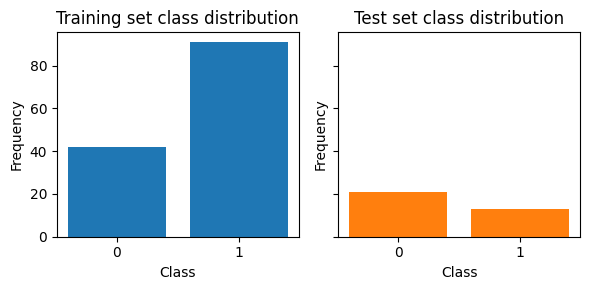

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(6, 3), sharey=True)

train_values, train_counts = np.unique(y_train, return_counts=True)
test_values, test_counts = np.unique(y_test, return_counts=True)

# Train distribution
axes[0].bar(train_values, train_counts, color="#1f77b4")
axes[0].set_title("Training set class distribution")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Frequency")
axes[0].set_xticks(train_values)

# Test distribution
axes[1].bar(test_values, test_counts, color="#ff7f0e")
axes[1].set_title("Test set class distribution")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Frequency")
axes[1].set_xticks(test_values)

plt.tight_layout()
plt.show()


Train a Decission Tree Classifier

In [80]:
dtc = DecisionTreeClassifier(criterion="gini", random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


Evaluate trained model.

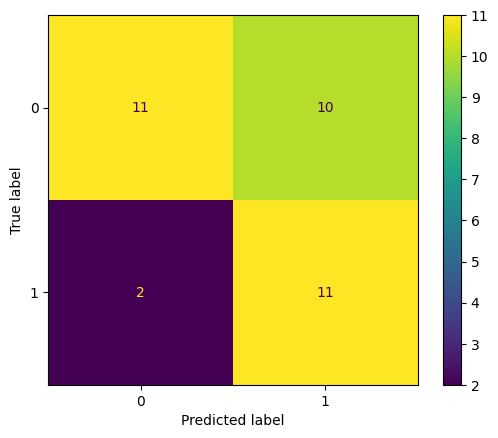

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.52      0.65        21
        True       0.52      0.85      0.65        13

    accuracy                           0.65        34
   macro avg       0.68      0.68      0.65        34
weighted avg       0.72      0.65      0.65        34



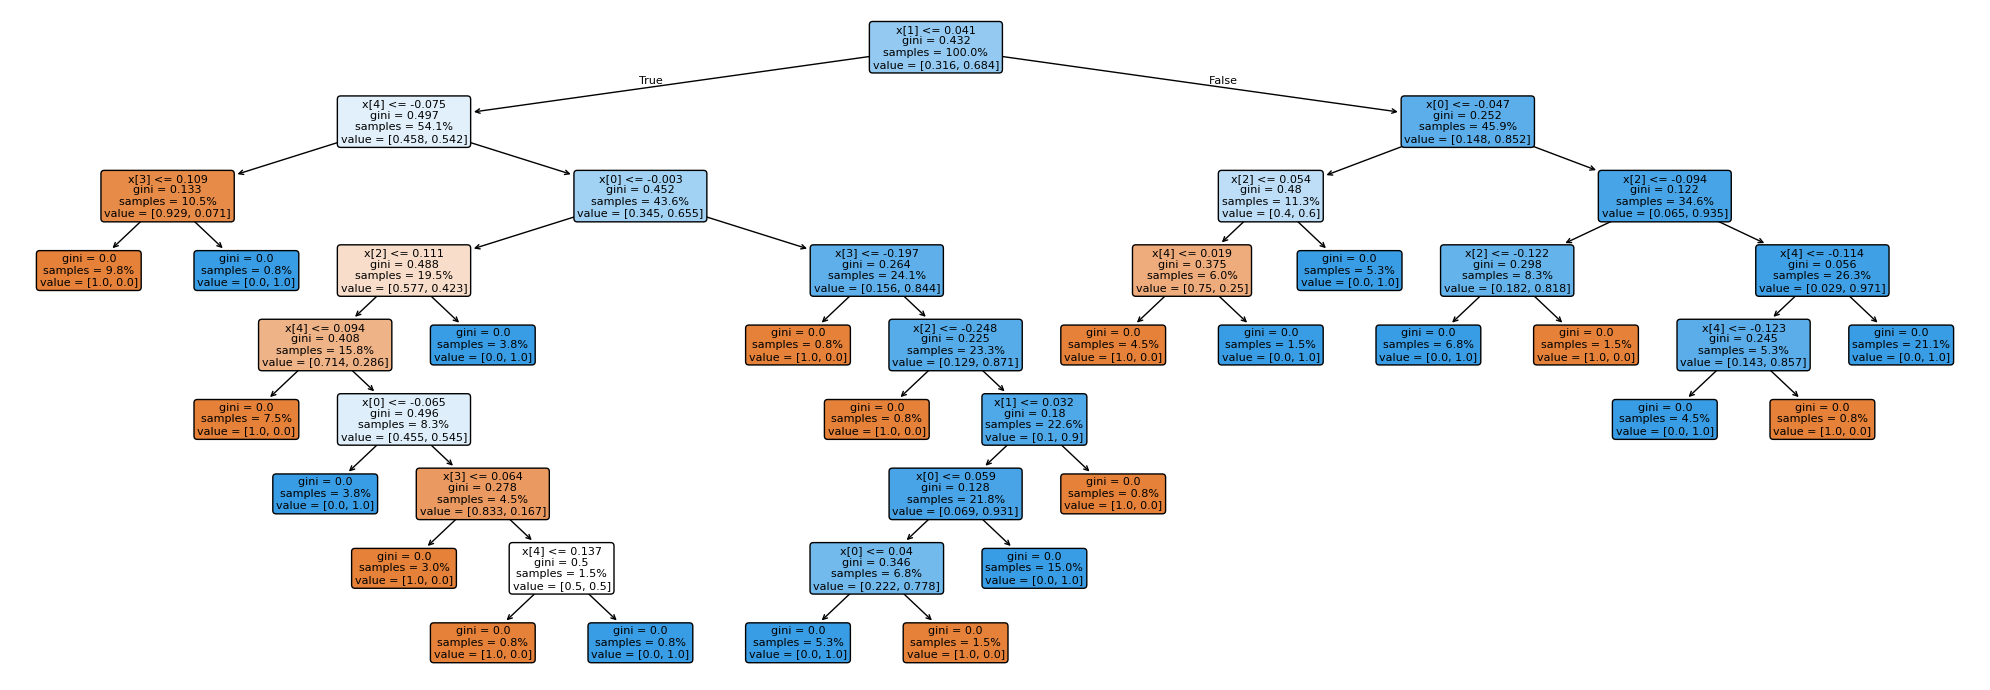

In [88]:
fig, ax = plt.subplots(figsize=(20, 7))
plot_tree(dtc, proportion=True, filled=True, rounded=True, ax=ax, fontsize=8)
plt.tight_layout()
plt.show()


**Homework**  
- Use weekly resampling on Wednesdays.  
- Play with decission tree parameters to improve results.

## Playing with financial assets: Bankrupcy risk prediction model

Ref.:
- Book: <a href="https://www.packtpub.com/en-us/product/hands-on-artificial-intelligence-for-banking-9781788833967?srsltid=AfmBOopqDgDu6joWOmyfcW-y7zHtC72wvy9-o1Wgg05dWgBW_UgaePCx">Hands-On Artificial Intelligence for Banking: A practical guide to building intelligent financial applications using machine learning techniques</a> - Chapter 3.
- Dataset: <a href="https://archive.ics.uci.edu/dataset/365/polish+companies+bankruptcy+data">Polish Companies Bankruptcy dataset</a>

The bank, as the lender, needs to dictate the interest rates that will cover the cost of lending. The bank provides the interest rate by considering its cost of borrowing from others, plus the risk that the company might file for bankruptcy after taking the loan from the bank.

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    roc_curve,
    auc,
    confusion_matrix,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    average_precision_score,
)

Read data

In [2]:
data = pd.read_csv("../dataset/5year.csv")
for i in range(1, 65, 1):
    data.loc[:, f"Attr{i}"] = pd.to_numeric(data.loc[:, f"Attr{i}"], errors="coerce", downcast="float")
data.loc[:, "class"] = pd.to_numeric(data.loc[:, "class"], errors="raise", downcast="integer")
data = data.infer_objects(copy=False)  # Convert object columns to best possible types
data = data.fillna(value=0.0)  # Fill NaNs after type conversion
data

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.088238,0.55472,0.011340,1.02050,-66.519997,0.342040,0.109490,0.57752,1.08810,0.320360,...,0.080955,0.275430,0.91905,0.002024,7.271100,4.734300,142.759995,2.5568,3.25970,0
1,-0.006202,0.48465,0.232980,1.59980,6.182500,0.000000,-0.006202,1.06340,1.27570,0.515350,...,-0.028591,-0.012035,1.00470,0.152220,6.091100,3.274900,111.139999,3.2841,3.37000,0
2,0.130240,0.22142,0.577510,3.60820,120.040001,0.187640,0.162120,3.05900,1.14150,0.677310,...,0.123960,0.192290,0.87604,0.000000,8.793400,2.987000,71.530998,5.1027,5.61880,0
3,-0.089951,0.88700,0.269270,1.52220,-55.992001,-0.073957,-0.089951,0.12740,1.27540,0.113000,...,0.418840,-0.796020,0.59074,2.878700,7.652400,3.330200,147.559998,2.4735,5.92990,0
4,0.048179,0.55041,0.107650,1.24370,-22.959000,0.000000,0.059280,0.81682,1.51500,0.449590,...,0.240400,0.107160,0.77048,0.139380,10.118000,4.095000,106.430000,3.4294,3.36220,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,0.012898,0.70621,0.038857,1.17220,-18.907000,0.000000,0.013981,0.41600,1.67680,0.293790,...,0.020169,0.043904,1.01220,1.259400,13.472000,12.432000,49.117001,7.4313,2.27990,1
5906,-0.578050,0.96702,-0.800850,0.16576,-67.364998,-0.578050,-0.578050,-0.40334,0.93979,-0.390040,...,-0.064073,1.482000,1.06410,-0.018084,110.720001,44.758999,81.220001,4.4940,5.13050,1
5907,-0.179050,1.25530,-0.275990,0.74554,-120.440002,-0.179050,-0.154930,-0.26018,1.17490,-0.326590,...,0.148880,0.548240,0.85112,-0.522430,9.852600,3.489200,207.869995,1.7559,9.95270,1
5908,-0.108860,0.74394,0.015449,1.08780,-17.003000,-0.108860,-0.109180,0.12531,0.84516,0.093224,...,-0.183200,-1.167700,1.18320,6.092400,13.886000,6.076900,83.122002,4.3911,0.95575,1


Read attribute names

In [3]:
# Open file.
attrib_file_name = open("../dataset/attrib.txt", "r")
attrib_contents = attrib_file_name.read()

# Read column names.
y_name = "target"
regexp = re.compile(r"X[0-9]+\s")
feature_names = regexp.split(attrib_contents)
feature_names = feature_names[1:]
feature_names.append(y_name)
data.columns = feature_names

In [4]:
data.describe()

,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets\n,target
count,5910.000000,5910.000000,5910.000000,5910.000000,5.910000e+03,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000,...,5910.000000,5910.000000,5910.000000,5910.000000,5.910000e+03,5910.000000,5910.000000,5910.000000,5910.000000,5910.000000
mean,-0.022335,0.464849,0.189059,4.875091,1.937064e+01,0.022572,-0.111894,5.720265,1.588054,0.545303,...,0.057222,-0.263704,0.956504,0.279177,8.697212e+02,10.913727,241.978184,9.095307,64.094887,0.069374
std,6.162090,5.749832,1.177437,91.272416,2.150927e+04,9.989544,9.054836,102.199574,1.548397,5.762292,...,0.698096,18.420415,0.857326,5.839075,6.268324e+04,41.117993,6221.135690,102.892414,2131.102763,0.254110
min,-463.890015,-430.869995,-72.067001,-0.403110,-1.076400e+06,-463.890015,-517.479980,-3.735100,-3.496000,-71.444000,...,-46.787998,-1236.300049,-0.164390,-184.979996,-1.244000e+01,-0.092493,-236.529999,-1.543200,-3.726500,0.000000
25%,0.003895,0.255100,0.043530,1.090175,-4.369900e+01,0.000000,0.005836,0.477145,1.014725,0.318690,...,0.010996,0.015563,0.876553,0.000000,4.822400e+00,4.261125,44.646751,3.043600,2.048475,0.000000
50%,0.046658,0.451610,0.219360,1.646700,3.918550e-01,0.000000,0.056433,1.144050,1.139650,0.522925,...,0.053218,0.109645,0.950370,0.005671,8.576400e+00,6.188550,73.778500,4.918850,3.992700,0.000000
75%,0.117040,0.661530,0.418318,2.922650,4.865500e+01,0.108490,0.136825,2.761725,1.825875,0.720620,...,0.125085,0.242785,0.990405,0.204990,1.657500e+01,9.342925,118.720001,8.104950,9.053725,0.000000
max,87.459000,72.416000,28.336000,6845.799805,1.250100e+06,543.250000,5.530000,6868.500000,65.607002,339.850006,...,1.651000,87.981003,47.787998,308.149994,4.818700e+06,1308.500000,451380.000000,7641.299805,158180.000000,1.000000


Split in train and test datasets

In [5]:
X = data.iloc[:, :-1]  # All columns except target.
y = data.iloc[:, -1]  # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4728, 64) (4728,)
(1182, 64) (1182,)


Train model

In [6]:
std = StandardScaler()
X_train_std = pd.DataFrame(std.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std.transform(X_test), columns=X_test.columns)


In [7]:
model = DecisionTreeClassifier(criterion="gini", random_state=42)
model.fit(X_train_std, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


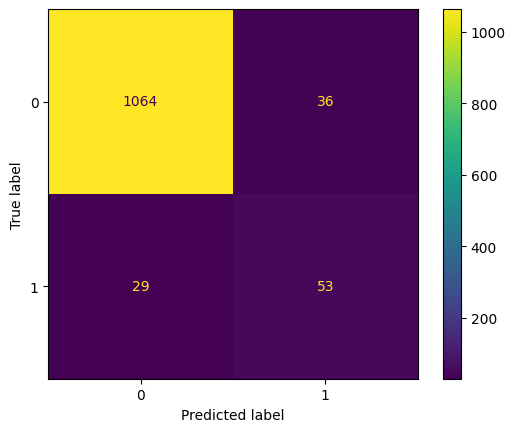

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1100
           1       0.60      0.65      0.62        82

    accuracy                           0.95      1182
   macro avg       0.78      0.81      0.80      1182
weighted avg       0.95      0.95      0.95      1182



In [8]:
y_pred = model.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))


ROC (Receiver Operating Characteristic)

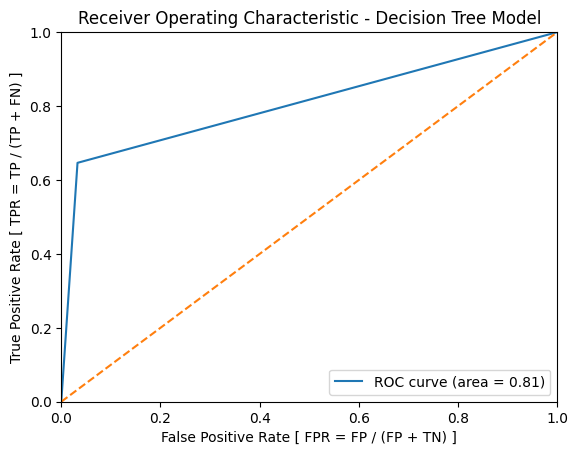

In [ ]:
z = model.predict_proba(X_test_std)[:, 1]

# Compute FPR and TPR based on different thresholds.
# Thresholds are between [min(z), +inf] interval.
# When sigmoid is shifted to +inf, the prediction is always 0.
# When sigmoid is shifted to min(z), the prediction is always 1.
fpr, tpr, thresholds = roc_curve(y_test, z, pos_label=1)

# Compute AUC (Area Under the Curve).
roc_auc = auc(fpr, tpr)

# Plot ROC curve.
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate [ FPR = FP / (FP + TN) ]")
plt.ylabel("True Positive Rate [ TPR = TP / (TP + FN) ]")
plt.title("Receiver Operating Characteristic - Decision Tree Model")
plt.legend(loc="lower right")
plt.show()


PR (Precision-Recall)

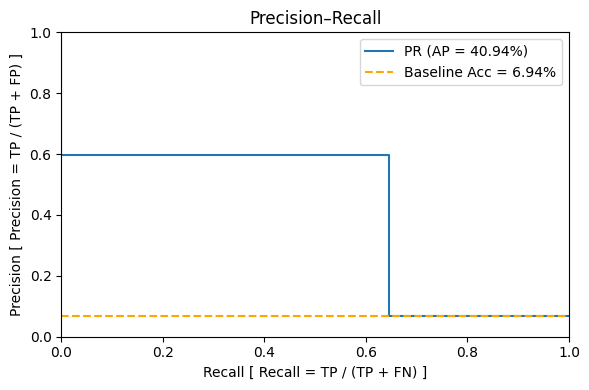

In [17]:
# Compute PR (Precision-Recal curve)
prec, rec, thr = precision_recall_curve(y_test, z)
# PR-AUC (Precision-Recall Area Under the Curve)
ap = average_precision_score(y_test, z)

plt.figure(figsize=(6, 4))
plt.step(rec, prec, where="post", label=f"PR (AP = {ap:.2%})")
# Base line (Accuracy) = always say 1.
base = y_test.mean()
plt.hlines(base, 0, 1, linestyles="--", label=f"Baseline Acc = {base:.2%}", color="orange")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Recall [ Recall = TP / (TP + FN) ]")
plt.ylabel("Precision [ Precision = TP / (TP + FP) ]")
plt.title("Precision–Recall")
plt.legend()
plt.tight_layout()
plt.show()


Importance by permutation

In [18]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(
    estimator=model,
    X=X_test_std,
    y=y_test,
    scoring="f1_weighted",  # Evaluation metric.
    n_repeats=10,  # Number of permutations applied to each feature (K).
    random_state=42,  # Random state for reproducibility.
    n_jobs=-1,  # Number of jobs to run in paralell (-1 means using all available cores).
)


In [19]:
# importances_mean: ndarray of shape (n_features, ) Mean of feature importance over n_repeats.
# importances_std: ndarray of shape (n_features, ) Standard deviation over n_repeats.
# importances: ndarray of shape (n_features, n_repeats) Raw permutation importance scores.
importante_df = pd.DataFrame({"feature": X_test_std.columns, "mean": pi.importances_mean, "std": pi.importances_std})
importante_df.sort_values("mean", ascending=False, inplace=True)
importante_df


,feature,mean,std
26,profit on operating activities / financial exp...,0.095193,0.003642
40,total liabilities / ((profit on operating acti...,0.060395,0.004021
20,sales (n) / sales (n-1),0.027861,0.002077
33,operating expenses / total liabilities,0.022007,0.003277
29,(total liabilities - cash) / sales,0.017625,0.002017
...,...,...,...
18,gross profit / sales,-0.000483,0.000316
45,(current assets - inventory) / short-term liab...,-0.001043,0.001611
60,sales / receivables,-0.001175,0.000696
11,gross profit / short-term liabilities,-0.001591,0.000444


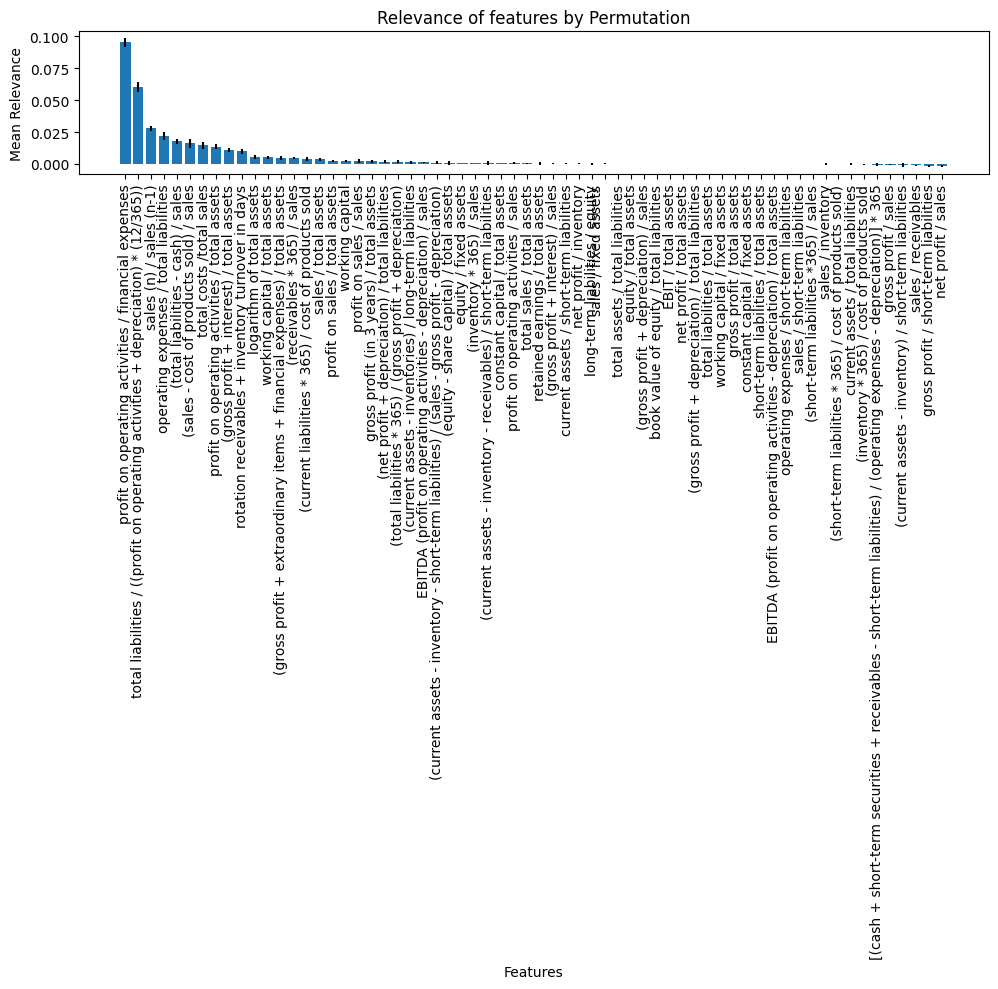

In [20]:
plt.figure(figsize=(10, 10))
plt.title("Relevance of features by Permutation")
plt.bar(
    range(importante_df.shape[0]), importante_df["mean"], yerr=importante_df["std"], tick_label=importante_df["feature"]
)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Relevance")
plt.tight_layout()
plt.show()


In [21]:
from tqdm import tqdm

import warnings

warnings.filterwarnings("ignore")  # To avoid convergence warnings.

features_importantes = list(importante_df["feature"])

metrics_total_forward = []
for idx in tqdm(range(len(features_importantes))):
    # Entrenamos el modelo.
    model = DecisionTreeClassifier(criterion="gini", random_state=42)
    model.fit(X_train_std.loc[:, features_importantes[: idx + 1]], y_train)

    # Predecimos el conjunto de Validación.
    y_pred = model.predict(X_test_std.loc[:, features_importantes[: idx + 1]])

    # Calculamos el reporte de clasificación.
    metrics = classification_report(y_test, y_pred, output_dict=True)
    metrics_total_forward.append(metrics["1"]["recall"])


100%|██████████| 64/64 [00:16<00:00,  3.93it/s]


Best f1_weighted: 0.6707317073170732 at index 10


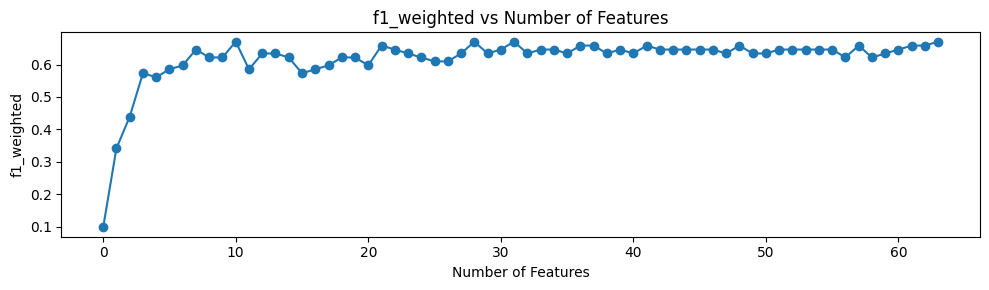

In [22]:
metric = "f1_weighted"
idx_max = metrics_total_forward.index(max(metrics_total_forward))
print(f"Best {metric}: {max(metrics_total_forward)} at index {idx_max}")

plt.figure(figsize=(10, 3))
plt.plot(range(len(features_importantes)), metrics_total_forward, marker="o")
plt.title(f"{metric} vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel(f"{metric}")
plt.tight_layout()
plt.show()


Now using the state of the art of tree ensembles: ``XGBoost``

Ref.: https://xgboost.readthedocs.io/en/stable/index.html

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [74]:
from xgboost import XGBClassifier


In [75]:
std = StandardScaler()
X_train_std = pd.DataFrame(std.fit_transform(X_train), columns=X_train.columns)
X_test_std = pd.DataFrame(std.transform(X_test), columns=X_test.columns)


In [ ]:
new_column_names = [f"Attr_{i + 1}" for i in range(X_train_std.shape[1])]
X_train_std.columns = new_column_names
X_test_std.columns = new_column_names

In [77]:
# Create model instance
bst = XGBClassifier(
    n_estimators=50,
    max_depth=6,
    learning_rate=0.3,
    reg_lambda=1,
    reg_alpha=0,
    scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
    objective="binary:logistic",
)
# Fit model
bst.fit(X_train_std, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


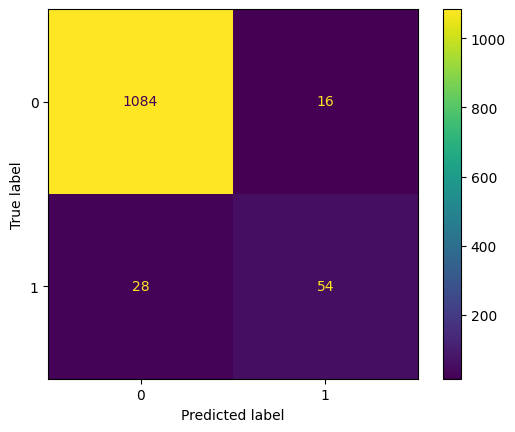

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1100
           1       0.77      0.66      0.71        82

    accuracy                           0.96      1182
   macro avg       0.87      0.82      0.85      1182
weighted avg       0.96      0.96      0.96      1182



In [78]:
y_pred = bst.predict(X_test_std)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_test, y_pred))


ROC (Receiver Operating Characteristic)

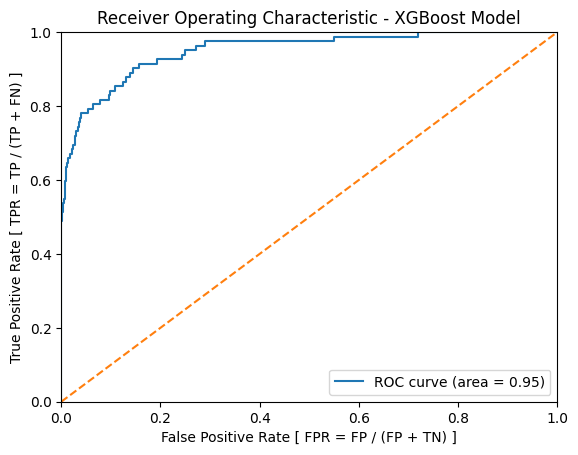

In [79]:
z = bst.predict_proba(X_test_std)[:, 1]

# Compute FPR and TPR based on different thresholds.
# Thresholds are between [min(z), +inf] interval.
# When sigmoid is shifted to +inf, the prediction is always 0.
# When sigmoid is shifted to min(z), the prediction is always 1.
fpr, tpr, thresholds = roc_curve(y_test, z, pos_label=1)

# Compute AUC (Area Under the Curve).
roc_auc = auc(fpr, tpr)

# Plot ROC curve.
plt.figure()
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate [ FPR = FP / (FP + TN) ]")
plt.ylabel("True Positive Rate [ TPR = TP / (TP + FN) ]")
plt.title("Receiver Operating Characteristic - XGBoost Model")
plt.legend(loc="lower right")
plt.show()


PR (Precision-Recall)

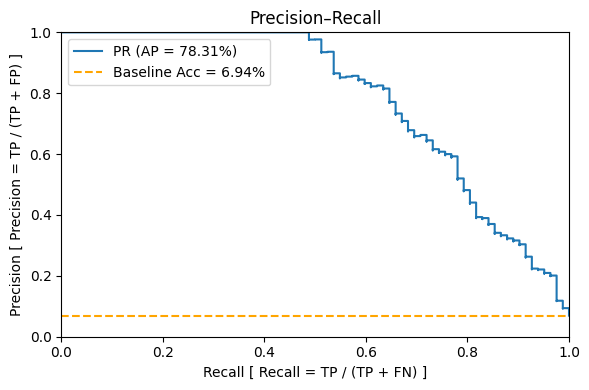

In [80]:
# Compute PR (Precision-Recal curve)
prec, rec, thr = precision_recall_curve(y_test, z)
# PR-AUC (Precision-Recall Area Under the Curve)
ap = average_precision_score(y_test, z)

plt.figure(figsize=(6, 4))
plt.step(rec, prec, where="post", label=f"PR (AP = {ap:.2%})")
# Base line (Accuracy) = always say 1.
base = y_test.mean()
plt.hlines(base, 0, 1, linestyles="--", label=f"Baseline Acc = {base:.2%}", color="orange")

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Recall [ Recall = TP / (TP + FN) ]")
plt.ylabel("Precision [ Precision = TP / (TP + FP) ]")
plt.title("Precision–Recall")
plt.legend()
plt.tight_layout()
plt.show()


Importance by permutation

In [81]:
from sklearn.inspection import permutation_importance

pi = permutation_importance(
    estimator=bst,
    X=X_test_std,
    y=y_test,
    scoring="recall",  # Evaluation metric.
    n_repeats=10,  # Number of permutations applied to each feature (K).
    random_state=42,  # Random state for reproducibility.
    n_jobs=-1,  # Number of jobs to run in paralell (-1 means using all available cores).
)


In [82]:
# importances_mean: ndarray of shape (n_features, ) Mean of feature importance over n_repeats.
# importances_std: ndarray of shape (n_features, ) Standard deviation over n_repeats.
# importances: ndarray of shape (n_features, n_repeats) Raw permutation importance scores.
importante_df = pd.DataFrame({"feature": X_test_std.columns, "mean": pi.importances_mean, "std": pi.importances_std})
importante_df.sort_values("mean", ascending=False, inplace=True)
importante_df


,feature,mean,std
20,Attr_21,0.240244,0.032288
26,Attr_27,0.160976,0.019512
33,Attr_34,0.058537,0.009126
34,Attr_35,0.042683,0.014685
38,Attr_39,0.042683,0.009832
...,...,...,...
29,Attr_30,-0.007317,0.008089
50,Attr_51,-0.007317,0.005974
48,Attr_49,-0.008537,0.005589
27,Attr_28,-0.009756,0.004878


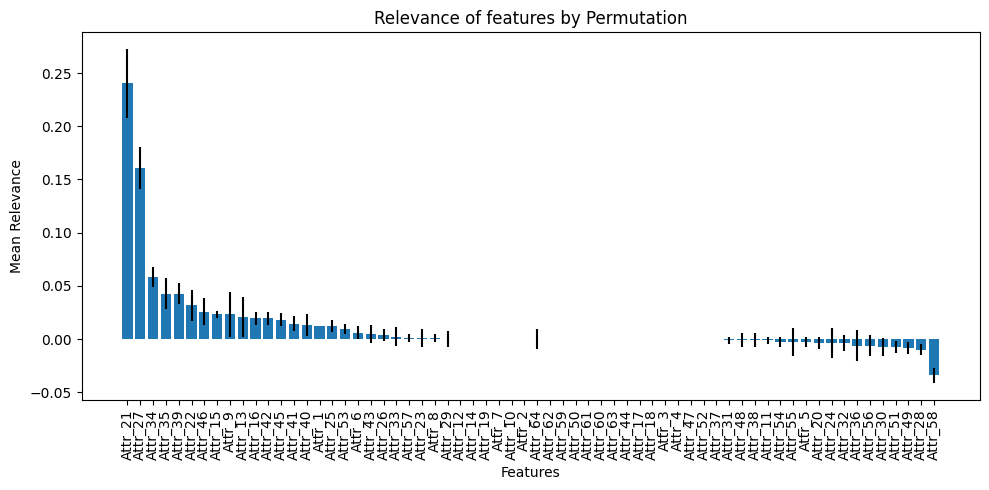

In [83]:
plt.figure(figsize=(10, 5))
plt.title("Relevance of features by Permutation")
plt.bar(
    range(importante_df.shape[0]), importante_df["mean"], yerr=importante_df["std"], tick_label=importante_df["feature"]
)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Mean Relevance")
plt.tight_layout()
plt.show()


In [84]:
from tqdm import tqdm

import warnings

warnings.filterwarnings("ignore")  # To avoid convergence warnings.

features_importantes = list(importante_df["feature"])

metrics_total_forward = []
for idx in tqdm(range(len(features_importantes))):
    # Entrenamos el modelo.
    # Create model instance
    bst = XGBClassifier(
        n_estimators=50,
        max_depth=6,
        learning_rate=0.3,
        reg_lambda=1,
        reg_alpha=0,
        scale_pos_weight=y_train.value_counts()[0] / y_train.value_counts()[1],
        objective="binary:logistic",
    )
    bst.fit(X_train_std.loc[:, features_importantes[: idx + 1]], y_train)

    # Predecimos el conjunto de Validación.
    y_pred = bst.predict(X_test_std.loc[:, features_importantes[: idx + 1]])

    # Calculamos el reporte de clasificación.
    metrics = classification_report(y_test, y_pred, output_dict=True)
    metrics_total_forward.append(metrics["1"]["recall"])


100%|██████████| 64/64 [00:17<00:00,  3.74it/s]


Best Recall: 0.7073170731707317 at index 28


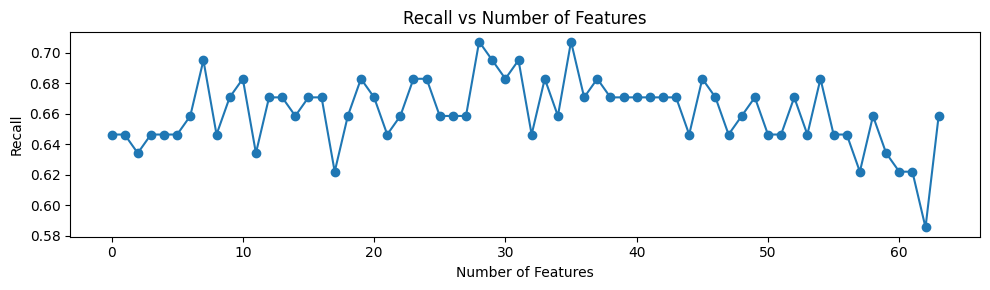

In [85]:
metric = "Recall"
idx_max = metrics_total_forward.index(max(metrics_total_forward))
print(f"Best {metric}: {max(metrics_total_forward)} at index {idx_max}")

plt.figure(figsize=(10, 3))
plt.plot(range(len(features_importantes)), metrics_total_forward, marker="o")
plt.title(f"{metric} vs Number of Features")
plt.xlabel("Number of Features")
plt.ylabel(f"{metric}")
plt.tight_layout()
plt.show()
